## Importing Requires Python Libraries

In [1]:
#data manipulation
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#data spliting
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

#model
from sklearn.linear_model import LogisticRegression

#model evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

#file handling for streamlit
import pickle

## Dataset Exploring & Preprocessing  

In [2]:
df=pd.read_csv("mail_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
df.shape

(5572, 2)

In [5]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
df.isna().sum()

Category    0
Message     0
dtype: int64

## Label Encoding

In [8]:
# spam as 1
# ham as 0
df['Category']=df['Category'].map({"spam":0,"ham":1})

In [9]:
df.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   int64 
 1   Message   5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


## Model :- LinearRegression

In [11]:
x=df['Message']
y=df['Category']

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

---
✅ What is TfidfVectorizer?

TfidfVectorizer is a text feature extraction tool from sklearn.feature_extraction.text that converts raw text (like SMS or emails) into numerical feature vectors using TF-IDF:

- TF (Term Frequency): How often a word appears in a document

- IDF (Inverse Document Frequency): How rare a word is across all documents

Together, TF-IDF gives more importance to rare, meaningful words and less to common words like “the”, “is”, etc.

---

In [13]:
feature_extraction = TfidfVectorizer(min_df=1 , stop_words='english' , lowercase=True)

In [14]:
feature_extraction

TfidfVectorizer(stop_words='english')

In [15]:
x_train_features = feature_extraction.fit_transform(x_train)
x_test_features = feature_extraction.transform(x_test)

y_train = y_train.astype("int")
y_test = y_test.astype("int")

In [16]:
print(x_train_features)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 34840 stored elements and shape (4457, 7440)>
  Coords	Values
  (0, 5512)	0.1898892037332199
  (0, 7222)	0.2173884735352799
  (0, 258)	0.2379428657041507
  (0, 7162)	0.2550284465664535
  (0, 354)	0.3544175987866074
  (0, 2724)	0.3544175987866074
  (0, 7300)	0.24288153842988894
  (0, 2049)	0.3034375179183143
  (0, 3262)	0.33791755486732394
  (0, 5800)	0.17558937755823417
  (0, 6264)	0.1898892037332199
  (0, 694)	0.3171299579602537
  (0, 2497)	0.2442158912653505
  (0, 5818)	0.22682143517864364
  (1, 3267)	0.26787130770292167
  (1, 6109)	0.32397626344658004
  (1, 6738)	0.28986069568917994
  (1, 2335)	0.21623212751660786
  (1, 5650)	0.3604441444703179
  (1, 3333)	0.20665394084233094
  (1, 2440)	0.3387054464839871
  (1, 4509)	0.40282459910606705
  (1, 3932)	0.24325511357721422
  (1, 3804)	0.19029023465152678
  (1, 2555)	0.3840709491751003
  :	:
  (4452, 3084)	0.22948428918295163
  (4452, 3290)	0.26370969643076225
  (4452, 3978)	0

In [17]:
model = LogisticRegression()
model.fit(x_train_features , y_train)
y_pred = model.predict(x_test_features)
y_pred

array([1, 1, 1, ..., 1, 1, 1], shape=(1115,))

In [18]:
result={
    "Parameter":['Accuracy Score','F1 Score','Recall Score','Precision Score'],
    "Measurement":[accuracy_score(y_test,y_pred),f1_score(y_test,y_pred),
                   recall_score(y_test,y_pred),precision_score(y_test,y_pred)]
}
table=pd.DataFrame(result)

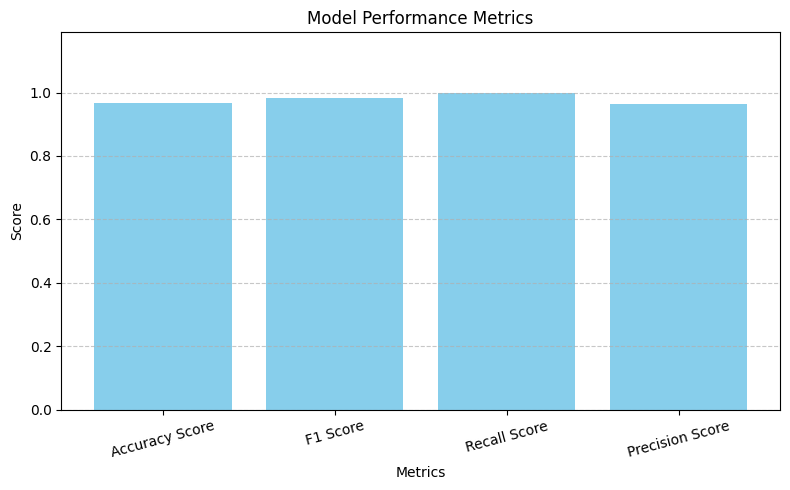

In [19]:
plt.figure(figsize=(8, 5))
plt.bar(table['Parameter'], table['Measurement'], color='skyblue')
plt.ylim(0, 1.19)
plt.title('Model Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

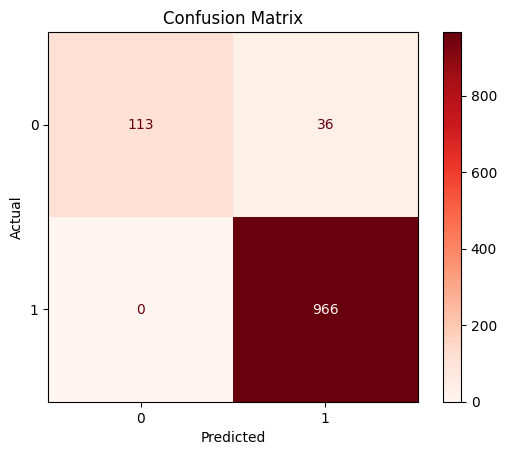

,Parameter,Measurement
0,Accuracy Score,0.967713
1,F1 Score,0.981707
2,Recall Score,1.000000
3,Precision Score,0.964072


In [20]:
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
table

In [21]:
#save model
filename = 'spam_model.pkl'
with open(filename,'wb') as file:
    pickle.dump(model,file)

In [22]:
# Save both vectorizer and model in one pickle file
with open('spam_model1.pkl', 'wb') as f:
    pickle.dump((feature_extraction,model), f)